# 1. Setting the data

Importing modules/libraries we will be using on the notebook.

In [177]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Generating a DataFrame (DF) 'data' using the dataset 'games.csv'.

In [97]:
data = pd.read_csv('datasets/games.csv')

# 2. Preparing the data

On the following code we can know the following information:

 * The columns names have a combination of caps and lowercase characters. We need to homologate them with a 'best practice' option.
 * Our DF have 11 columns and 6 of them have missing values. We need to evaluate if those cells will be filled and the value they will have.

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [99]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## 2.1. Changing columns names

With the following code we can convert all the columns to lowercase, giving us a better way to manipulate the information on future stages of the project.

In [100]:
data.columns = list(map(lambda column: column.lower(), list(data.columns)))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 2.2. Droping duplicated values

Once evaluating the quantity of duplicated rows, it is concluded the dataset has none duplicated rows and no further process id needed for this point.

In [101]:
data.duplicated().sum()

0

## 2.3. Missing values filling

### a) 'name' column

In this columns we have the name of each videogame on the list and there are 2 missing values (not significant). Replacing missing values with the value 'unknown'.

In [102]:
data['name'] = data['name'].fillna('unknown')
data['name'].isna().sum()

0

Once replaced, verify there are no missing values on the column. No missing values were returned. 

### b) 'year_of_release' column

In this column we have the year each videogame was released to the market and there are 269 missing values. Current values are on float dtype data; in case values can be represented on int dtype values, we can have change to a categoric dtype values with a better fitting format.

In [103]:
test = data['year_of_release'].fillna(0)

np.array_equal(test, test.astype('int'))

True

After evaluating the column, no information will be lost if column is converted to int dtype values. Proceeding to replacing NaN values with number 0, converting to int dtype, converting to str dtype, replacing 0 values with 'no_year' and converting column to categoric dtype (if statement used for practicity reasons).

In [138]:
if data['year_of_release'].dtypes == int:
    data['year_of_release'] = data['year_of_release'].fillna(0).astype('int').astype('str').replace(to_replace='0', value='no_year').astype('category')

print(f'Missing values after changes: {data['year_of_release'].isna().sum()}.')
data['year_of_release'].unique()

Missing values after changes: 0.


['2006', '1985', '2008', '2009', '1996', ..., '1991', '1981', '1987', '1980', '1983']
Length: 38
Categories (38, object): ['1980', '1981', '1982', '1983', ..., '2014', '2015', '2016', 'no_year']

Confirming we have the values as wanted.

### c) 'genre' column

This column has the genre each videogame is categorized. Even though is possible to work with this information as an object dtype data, in this case they will be converted to a categorical data. First fill the NaN values with 'no_genre' and then convert it to category dtype.

In [139]:
if data['genre'].dtypes == object:
    data['genre'] = data['genre'].fillna('no_genre').astype('category')

print(f'Missing values after changes: {data['genre'].isna().sum()}.')
data['genre'].unique()

Missing values after changes: 0.


['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', ..., 'Action', 'Fighting', 'Adventure', 'Strategy', 'no_genre']
Length: 13
Categories (13, object): ['Action', 'Adventure', 'Fighting', 'Misc', ..., 'Simulation', 'Sports', 'Strategy', 'no_genre']

Confirm changes were applied correctly.

### d) 'critic_score' column

This column has the score the various critic medias have given to the specific game in the dataset; it has 8578 missing values. It is important to determine how the missing values in this column shall be filled (in case if required) due to more than 50% of the dataset column is missing.

In my opinion, the best way to fill the missing values is to group the DF by 'platform-genre' relation and analyze whether the median or mean value is the best option to fill the missing values for each tuple 'platform-genre'. To make things simplier, for this case this will be determined comparing the mean and median values of all the existing values on the source dataset.

In [146]:
mean_critic = data['critic_score'].mean()
median_critic = data['critic_score'].median()

print(f"Median value: {median_critic}; and mean value: {mean_critic}.")

Median value: 71.0; and mean value: 68.96767850559173.


The values obtained are mean aprox. 69 and median 71. Though the diference between these two values indicates the data has a tendency of lower values, the diference is not significant enough to state either the median or mean value is the best option.

In my opinion, the best option to fill the missing values is the mean. This is because I consider better to give the lowest acceptable value possible in those cases missing values are more than existing values.

Though filling the missing values with the mean value will cause the tendency of data for all of the future analysis to be near the mean value, trying to get the real values for those rows could be more time consuming and not always can be possible to work with all the information.

In [147]:
test_3 = data['critic_score'].fillna(69)

np.array_equal(test_3, test_3.astype('int'))

True

Testing with the filling if making a change to a dtype int column will generate missing values. Once confirmed it will not, continue making the changes on the DF.

In [156]:
if data['critic_score'].dtypes != int:
    data['critic_score'] = data['critic_score'].fillna(69).astype('int')

print(f'Missing values after changes: {data['critic_score'].isna().sum()}.')
data['critic_score'].unique()

Missing values after changes: 0.


array([76, 69, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 50, 25, 42, 44, 55, 48, 57, 29, 47,
       65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39, 34,
       35, 41, 36, 28, 31, 27, 26, 19, 23, 24, 21, 17, 22, 13])

Once confirmed all changes were applied correctly, continue with next step.

### e) 'user_score' column

'user_score' is the column where the information of the score given by the users for a specific videogame, and has 6701 missing values. This column has a dtype object, which has to be changed because the values are meant to be processed as numbers (float numbers in this case, so we will change its dtype to it). Before applying the changes to the DF, analize if the missing values shall be filled with the mean value or the median value of the column.

In [154]:
test_4 = pd.to_numeric(data['user_score'], errors='coerce')

test_mean = test_4.mean()
test_median = test_4.median()

print(f"Median value: {test_median}; and mean value: {test_mean}.")

Median value: 7.5; and mean value: 7.125046113306982.


For the current column, the median and mean values do not vary much between them. Contrary as in 'critic_score', in this column the missing values will be filled with the median value because in my opinion the data will be less ambiguous than using the mean value and deciding to select 7.1 or 7.2 as standarize value.

In [161]:
if data['user_score'].dtype != float:
    data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
    data['user_score'] = data['user_score'].fillna(test_median)


print(f'Missing values after changes: {data['user_score'].isna().sum()}.')
data['user_score'].unique()

Missing values after changes: 0.


array([8. , 7.5, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 2.6, 7.2, 9.2,
       7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1,
       6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8, 5.6,
       5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5,
       1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. , 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

Confirm changes where applied correctly and continue with the project.

### f) 'rating' column

The 'rating' column has the information of the category in which the ESRB rates each of the videogames in the source dataset, and it has 6766 missing values. As seen below, this column has  dtype object values in it and one of the unique values is NaN (which we will be replacing). 

In [159]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Replacing NaN values with a representative vale 'no-rating' to state we do not know the ESRB's rating for that specific videogame, and then converting the dtype of the column to dtype category data.

In [162]:
if data['rating'].dtypes == object:
    data['rating'] = data['rating'].fillna('no-rating').astype('category')


print(f'Missing values after changes: {data['rating'].isna().sum()}.')
data['rating'].unique()

Missing values after changes: 0.


['E', 'no-rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']
Categories (9, object): ['AO', 'E', 'E10+', 'EC', ..., 'M', 'RP', 'T', 'no-rating']

Confirm all cahnges were applied correctly and continue with the project.

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16715 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16715 non-null  category
 3   genre            16715 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     16715 non-null  int64   
 9   user_score       16715 non-null  float64 
 10  rating           16715 non-null  category
dtypes: category(3), float64(5), int64(1), object(2)
memory usage: 1.1+ MB


Confirming that all changes were applied checking on the info of the DF. None of the columns have missing values and also the dtype changes we applied previously can be seen at this point.

# 3. Analizing the data

## 3.1. How many games were launched on every year?

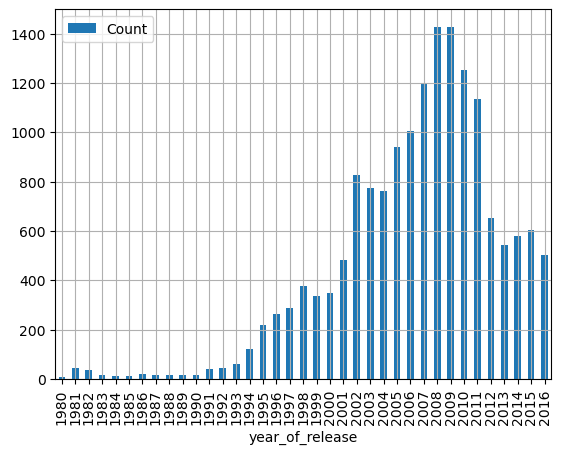

In [194]:
games_per_year = data[data['year_of_release'] != 'no_year'].groupby('year_of_release', observed=True)['name'].count().reset_index()
games_per_year.columns = ['year_of_release', 'count']

games_per_year.plot(kind='bar',
                    x='year_of_release',
                    y='count',
                    grid=True)
plt.legend(['Count'])

# 4. Creating an user profile per region

# 5. Hyphotesis testing

# 6. General conclusions